# Project: Wrangling and Analysis of WeRateDogs Twitter Account.
*In this project, I will be wrangling and Analysing a a number of datasets related to WeRateDogs Twitter account. These Dataset contain unique observtions related to Dog ratings.*


## Data Gathering
*The first step to begin this process is to gather the required data. These can be done in the following ways:*

*1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)* 

*2. Downloading a tsv file programmatically(image-predictions.tsv), this file contains data refering to dog breeds* 

*3. loading data from a json file(This data was originally extracted from Twitter's API and provided by UDACITY*

### Import prerequisite utilities to execute project

In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import os
%matplotlib inline

*1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)*

In [2]:
#Import twitter-archive-enhanced.csv) as a dataframe
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Make directory if it doesn't already exist.
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Download image prediction data programmatically.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image_predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
# Read downloded content into pandas dataframe.
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Twitter API couldn't be queried successfully, the alternative is to load a pre-existing Json file contining data that was queried prior to this operation. attempts will still be made at securing approval for a Twitter developer account but before then the information in the dataset will be sufficient for the project exercise.

In [6]:
# load json file containing twitter API data into a dataframe.
dftweet_extended = pd.read_json('tweet-json.txt', lines = True, encoding='utf-8')

In [7]:
# Select the columns I will require for project execution
df_api = dftweet_extended[['id', 'retweet_count', 'favorite_count']]

# Assessing Data:
In this section I will be evaluating the Data gathered above for deficiencies. In the process of Assessment, I will be looking out for Quality and Tidiness issues. Quality issues refers to issues that makes the data 'Dirty', such as missing, corrupted, inacurate, duplicate or incorrect data. while Tidiness refers to the issues that make the data 'Messy' such as its structure. Two ways in which data issues can be detected is through **Visual assessment** and **Programatic assessment**. These will be done in the following cells.

For the purpose of this project we will detecting at least **eight quality  issues** and **two tidiness issues**.

## Twitter archive assessment

In [8]:
# Visual assessment of twitter archive enhanced dataframe
df_arch

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [9]:
# Programmatic assessment of twitter archive enhanced dataframe
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Programmatic assessment of null values in twitter archive enhanced dataframe.
df_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# Programatically assessing the Descriptive Statistics of twitter archive enhanced dataframe
df_arch.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [12]:
# Programmatic assessment for detection of duplicates
df_arch.duplicated().sum()

0

In [13]:
# Programmatically assess rating numrator values
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)
oo = df_arch[df_arch[ 'rating_numerator'] >20][['rating_numerator', 'text']].sort_values(by='rating_numerator', ascending=True)
oo

rating_numerator  \
516                 24   
1712                26   
763                 27   
1433                44   
1274                45   
1202                50   
1351                60   
340                 75   
695                 75   
1254                80   
433                 84   
1843                88   
1228                99   
1635               121   
1634               143   
1779               144   
902                165   
290                182   
1120               204   
188                420   
2074               420   
189                666   
313                960   
979               1776   

                                                                                                                                                                           text  
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx  
1712                                                                 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD  
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq  
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ  
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK  
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq  
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa  
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…  
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS  
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12  
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd  
1843                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw  
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1  
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55  
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3  
1779                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq  
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE  
290                                                                                                                                                    

In [14]:
df_arch.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [15]:
# Programatic assessment of rating denominator
df_arch.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [16]:
# Programatic assessment of source column
df_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
# Assessment of rows that are retweets
df_arch[ df_arch.retweeted_status_id.isnull() == False]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
91    874434818259525634                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
109   871166179821445120                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
130   867072653475098625                    NaN                  NaN   
132   866816280283807744                    NaN                  NaN   
137   866094527597207552                    NaN                  NaN   
146   863471782782697472                    NaN                  NaN   
155   861769973181624320                    NaN                  NaN   
159   860981674716409858                    NaN                  NaN   
160   860924035999428608                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
171   858860390427611136                    NaN                  NaN   
180   857062103051644929                    NaN                  NaN   
182   856602993587888130                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
195   855138241867124737                    NaN                  NaN   
204   852936405516943360                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
212   851861385021730816                    NaN                  NaN   
222   849668094696017920                    NaN                  NaN   
230   847978865427394560                    NaN                  NaN   
231   847971574464610304                    NaN                  NaN   
247   845459076796616705                    NaN                  NaN   
250   845098359547420673                    NaN                  NaN   
260   842892208864923648                    NaN                  NaN   
266   841833993020538882                    NaN                  NaN   
272   840761248237133825                    NaN                  NaN   
273   840728873075638272                    NaN                  NaN   
281   839290600511926273                    NaN                  NaN   
285   838916489579200512                    NaN                  NaN   
286   838831947270979586                    NaN                  NaN   
289   838201503651401729                    NaN                  NaN   
298   837012587749474308                    NaN                  NaN   
302   836648853927522308                    NaN                  NaN   
303   836397794269200385                    NaN                  NaN   
307   835685285446955009                    NaN                  NaN   
309   835536468978302976                    NaN                  NaN   
310   835309094223372289                    NaN                  NaN   
319   834477809192075265                    NaN                  NaN   
327   833732339549220864                    NaN                  NaN   
332   832769181346996225                    NaN                  NaN   
340   832215909146226688                    NaN                  NaN   
341   832215726631055365                    NaN         

In [18]:
# Programmatic assessment of text column
df_arch.text[39]

"This is Lola. It's her first time outside. Must test the earth and taste the atmosphere. 13/10 you're doing great Lola https://t.co/74TKAUsLkO"

In [19]:
#Programatic assessment of expanded urls
df_arch['expanded_urls'].unique()

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

## Image Prediction Assessment

In [20]:
# Visual assessment of Image Prediction Dataframe
df_image

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
30    666418789513326592   
31    666421158376562688   
32    666428276349472768   
33    666430724426358785   
34    666435652385423360   
35    666437273139982337   
36    666447344410484738   
37    666454714377183233   
38    666644823164719104   
39    666649482315059201   
40    666691418707132416   
41    666701168228331520   
42    666739327293083650   
43    666776908487630848   
44    666781792255496192   
45    666786068205871104   
46    666804364988780544   
47    666817836334096384   
48    666826780179869698   
49    666835007768551424   
50    666837028449972224   
51    666983947667116034   
52    666996132027977728   
53    667012601033924608   
54    667044094246576128   
55    667062181243039745   
56    667065535570550784   
57    667073648344346624   
58    667090893657276420   
59    667119796878725120   
60    667138269671505920   
61    667152164079423490   
62    667160273090932737   
63    667165590075940865   
64    667171260800061440   
65    667174963120574464   
66    667176164155375616   
67    667177989038297088   
68    667182792070062081   
69    667188689915760640   
70    667192066997374976   
71    667200525029539841   
72    667211855547486208   
73    667369227918143488   
74    667393430834667520   
75    667405339315146752   
76    667435689202614272   
77    667437278097252352   
78    667443425659232256   
79    667453023279554560   
80    667455448082227200   
81    667470559035432960   
82    667491009379606528   
83    667495797102141441   
84    667502640335572993   
85    667509364010450944   
86    667517642048163840   
87    667524857454854144   
88    667530908589760512   
89    667534815156183040   
90    667538891197542400   
91    667544320556335104   
92    667546741521195010   
93    667549055577362432   
94    667550882905632768   
95    667550904950915073   
96    667724302356258817   
97    667728196545200128   
98    667766675769573376   
99    667773195014021121   
100   667782464991965184   
101   667793409583771648   
102   667801013445750784   
103   667806454573760512   
104   667832474953625600   
105   667861340749471744   
106   667866724293877760   
107   667873844930215936   
108   667878741721415682   
109   667885044254572545   
110   667886921285246976   
111   667902449697558528   
112   667911425562669056   
113   667915453470232577   
114   667924896115245057   
115   667937095915278337   
116   668113020489474048   
117   668142349051129856   
118   668154635664932864   
119   668171859951755264   
120   668190681446379520   
121   668204964695683073   
122   668221241640230912   
123   668226093875376128   
124   668237644992782336   
125   668248472370458624   
126   668256321989451776   
127   668268907921326080   
128   668274247790391296   
129   668286279830867968   
130   668291999406125056   
131   668297328638447616   
132   668466899341221888   
133   668480044826800133   
134   668484198282485761   
135   668496999348633600   
136   668507509523615744   
137   668528771708952576   
138   668537837512433665   
139   668542336805281792   
140   668544745690562560   
141   668567822092664832   
142   668614

In [21]:
# Programatic assessment of Image Prediction Dataframe
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Programatically assessing the Descriptive Statistics of Image Prediction Dataframe
df_image.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [23]:
# Programatic assessment in detection of duplicate values
df_image.duplicated().sum()

0

In [24]:
# Programatic assessment for observations relating to dogs only
dfimageDogs = df_image.loc[(df_image.p1_dog == True)]

In [25]:
# Programatic assessment of img_num column
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [26]:
# Programatic assessment of jpg_url column
df_image.jpg_url.unique()

array(['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
       'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg',
       'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', ...,
       'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg',
       'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
       'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg'], dtype=object)

## Twitter json file assessment

In [27]:
# Visual assessment of twitter json file
df_api.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [28]:
# Programatic/Descriptive assessment of twitter json data
df_api.describe()

id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

In [29]:
# Programatic assessment of Twitter-json dataframe information.
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
# Programatic assessment of detecting duplicate values in twitter-json(API) dataframe
df_api.duplicated().sum()

0

# Quality issues
After assessing the dataframes visually and programatically, a few defects have been identified, these defects/issues will be noted and addressed below.

**Twitter archive enhanced dataframe**

1.twitter archive data contains retweets. we are focusing on original tweets only.

2.the dog name column contains words that are inconsistent with the majority of the names in the column.

3.Some columns are not necessary for my analysis

4.rating denominator column contains inconsistent data and incorrect data

4.rating numerator column contains inconsistent values.

5.Source column contains a mix of html and tweet sources.

6.Some columns have inapporpriate data types. i.e (tweet_id, timestamp)

7.values labeled as None instead of Nan

8.Some rows in text column contains hypertext link

**Dogs image dataframe**

9.tweet_id column has numerical data type

10.Some values start with lowercase letters while others start with uppercases

11.Some image predictions are not dogs

**Twitter Json dataframe**

11.id column has inconsistent data type

# Tidiness issues
**Twitter archive enhanced**

1.Dog stage separated into multiple columns

2.Data about dogs and tweet are present in the same dataset

**Dog Image Dataframe**

3.Indescriptive column names (p1, p1_conf, p1_dog e.t.c)

**Tweet Json Dataframe**

4.id column name is inconsistent with id columns in previous datasets.

# Cleaning Data
In this section, I will attempt to clean **all** of the issues identified while assessing. 

In [31]:
# Make copies of original pieces of data
twitter_archiveCopy = df_arch.copy()
image_Copy = df_image.copy()
api_Copy = df_api.copy()
DogsimageOnly = dfimageDogs.copy()

# CLEANING TWITTER ARCHIVE ENHANCED DATASET

In [32]:
twitter_archiveCopy.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                             text  \
2351                     Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352    This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353           Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
2354  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2355          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   

      retweeted_status_id  retweeted_status_user_id  \
2351                  NaN                       NaN   
2352                  NaN                       NaN   
2353                  NaN                       NaN   
2354                  NaN                       NaN   
2355                  NaN                       NaN   

     retweeted_status_timestamp  \
2351                        NaN   
2352                        NaN   
2353                        NaN   
2354                        NaN   
2355                        NaN   

                                                        expanded_urls  \
2351  https://twitter.com/dog_rates/status/666049248165822465/photo/1   
2352  https://twitter.com/dog_rates/status/666044226329800704/photo/1   
2353  https://twitter.com/dog_rates/status/666033412701032449/photo/1   
2354  https://twitter.com/dog_rates/status/666029285002620928/photo/1   
2355  https://twitter.com/dog_rates/status/666020888022790149/photo/1   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
2351                 5                  10  None  None    None   None  None  
2352                 6                  10     a  None    None   None  None  
2353                 9                  10     a  None    None   None  None  
2354                 7                  10     a  None    None   None  None  
2355                 8                  10  None  None    None   None  None

#### Define: include original tweets only

#### Code

In [33]:
# exclude rows containing retweeets
twitter_archiveCopy = twitter_archiveCopy.loc[(twitter_archiveCopy['retweeted_status_id'].isnull()) & (twitter_archiveCopy['in_reply_to_status_id'].isnull())]
twitter_archiveCopy.shape

(2097, 17)

#### Test

In [34]:
# Check if dataframe contains retweets
twitter_archiveCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define: Rectify invalid dog names

#### Code

In [35]:
# fetch strange dog names in name columns
weirdnames = twitter_archiveCopy[twitter_archiveCopy.name.str.islower() == True]['name'].unique()

In [36]:
for names in weirdnames:
        twitter_archiveCopy.name.replace(names, 'None', inplace=True)

#### Test

In [37]:
# Check if the invalid dog names still exist in the name column
twitter_archiveCopy[twitter_archiveCopy.name.str.islower() == True][['name', 'tweet_id']]

Empty DataFrame
Columns: [name, tweet_id]
Index: []

In [38]:
# replace dog names labeled as None with Nan
twitter_archiveCopy.name.replace('None', np.nan, inplace=True)

In [39]:
# check in the name column to observe randomn values
twitter_archiveCopy.name.sample(5)

405        Cash
1734        NaN
777         NaN
1849     Buddah
729     Chipson
Name: name, dtype: object

#### Define: Filter dataframe for rows with reliable rating numerators

In [40]:
# code: 
twitter_archiveCopy = twitter_archiveCopy.loc[twitter_archiveCopy['rating_numerator'] <= 20]

#### Test:

In [41]:
twitter_archiveCopy[twitter_archiveCopy.rating_numerator > 20]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### Define: drop unnecessary columns

In [42]:
#Code:
twitter_archiveCopy.drop(['in_reply_to_status_id', 'expanded_urls', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'text'], axis=1, inplace=True)

In [43]:
#check to see if columns have been removed
twitter_archiveCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2079 non-null   int64 
 1   timestamp           2079 non-null   object
 2   source              2079 non-null   object
 3   rating_numerator    2079 non-null   int64 
 4   rating_denominator  2079 non-null   int64 
 5   name                1385 non-null   object
 6   doggo               2079 non-null   object
 7   floofer             2079 non-null   object
 8   pupper              2079 non-null   object
 9   puppo               2079 non-null   object
dtypes: int64(3), object(7)
memory usage: 178.7+ KB


#### Define: Rectify inconsistent denominator value

In [44]:
# Code: Update denominator value equals to 10
twitter_archiveCopy.rating_denominator = twitter_archiveCopy.rating_denominator = 10

#### Test:

In [45]:
# check to see what value is prevalent in the denominator column
twitter_archiveCopy.rating_denominator.value_counts()

10    2079
Name: rating_denominator, dtype: int64

#### Define: Fix unnecessary values in the source column

In [46]:
# Code: Replace non essential values with essential values
twitter_archiveCopy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Iphone', inplace=True)
twitter_archiveCopy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine', inplace=True)
twitter_archiveCopy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Web Client', inplace=True)
twitter_archiveCopy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', inplace=True)

#### Test: Check to see if values in source column has been fixed

In [47]:
twitter_archiveCopy.source.value_counts()

Iphone        1947
Vine            91
Web Client      31
TweetDeck       10
Name: source, dtype: int64

#### Define: Correct datatype of Source column

In [48]:
# Code: assign category data type to source column
twitter_archiveCopy.source = twitter_archiveCopy.source.astype('category')

#### Test: 

In [49]:
# Check to see the column data type
twitter_archiveCopy.source.dtype

CategoricalDtype(categories=['Iphone', 'TweetDeck', 'Vine', 'Web Client'], ordered=False)

#### Define: Fix timestamp column datatype

In [50]:
twitter_archiveCopy.timestamp = twitter_archiveCopy.timestamp.str[:-15]

In [51]:
# Code: assign timestamp column to datetime data type
twitter_archiveCopy.timestamp = pd.to_datetime(twitter_archiveCopy.timestamp)

#### Test: Check the data type of the timestamp column

In [52]:
# Check to see if timestamp column is now a date time object
twitter_archiveCopy.timestamp.sample(4)

1198   2016-04-04
1229   2016-03-26
2351   2015-11-16
964    2016-07-06
Name: timestamp, dtype: datetime64[ns]

#### Define: Make tweet_id column an object data type

In [53]:
# Code: assign object data type to tweet_id column
twitter_archiveCopy.tweet_id = twitter_archiveCopy.tweet_id.astype('object')

#### Test: Check the data type of the tweet_id column

In [54]:
# Check the data type of the tweet_id column
twitter_archiveCopy.tweet_id.dtype

dtype('O')

#### Define:  Create dog stage column

In [55]:
# Code: Create a formula to assign dog stage to its appropriate rows
def dogStages(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doogo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
        
    if not stage:
        return 'None'
    else:
        return ','.join(stage)
    
twitter_archiveCopy['dog_stage'] = twitter_archiveCopy.apply(lambda row: dogStages(row), axis=1)

#### Test : Check to see if our code was properly executed

In [56]:
# dog stage has been created, but the column holds dual variables.
twitter_archiveCopy.dog_stage.value_counts()

None             1744
pupper            220
doogo              72
puppo              23
floofer             9
doogo,pupper        9
doogo,puppo         1
doogo,floofer       1
Name: dog_stage, dtype: int64

#### Define: fix dog_stage column to avoid dual variables in one column

In [57]:
# Code: Split and explode dog stage column
twitter_archiveCopy['dog_stage'] = twitter_archiveCopy.dog_stage.str.split(',')

#### Test: Check the values in dog_stage column

In [58]:
twitter_archiveCopy = twitter_archiveCopy.explode('dog_stage')
twitter_archiveCopy.dog_stage.value_counts()

None       1744
pupper      229
doogo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [59]:
# Code: Drop previous og stage columns considering the fact that a single dog stage column has been created
twitter_archiveCopy.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1, inplace=True)

In [60]:
# Check to see our recently created dog stage column
twitter_archiveCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2090 non-null   object        
 1   timestamp           2090 non-null   datetime64[ns]
 2   source              2090 non-null   category      
 3   rating_numerator    2090 non-null   int64         
 4   rating_denominator  2090 non-null   int64         
 5   name                1389 non-null   object        
 6   dog_stage           2090 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 116.5+ KB


In [61]:
# Replace 'None' values in the dog stage column with Nan
twitter_archiveCopy.dog_stage.replace('None', np.nan,inplace=True )

####  Define: assign category data type to dog_stage column

In [62]:
# Code: Make dog stage column a category data type
twitter_archiveCopy.dog_stage = twitter_archiveCopy.dog_stage.astype('category')

#### Test: Check to see the data type of dog stage column

In [63]:
twitter_archiveCopy.dog_stage.dtype

CategoricalDtype(categories=['doogo', 'floofer', 'pupper', 'puppo'], ordered=False)

# CLEANING IMAGE PREDICTION DATASET

In [64]:
# Create copy of original dataframe for cleaning and reference purposes
DogsimageOnly = dfimageDogs.copy()
DogsimageOnly.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

In [65]:
DogsimageOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   int64  
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
 6   p2        1532 non-null   object 
 7   p2_conf   1532 non-null   float64
 8   p2_dog    1532 non-null   bool   
 9   p3        1532 non-null   object 
 10  p3_conf   1532 non-null   float64
 11  p3_dog    1532 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


#### Define: Assign object data type to tweet_id column

In [66]:
# Code: Make tweet_id string for the purpose of uniformity for with similar columns
DogsimageOnly.tweet_id = DogsimageOnly.tweet_id.astype('object')

#### Test: Check if tweet_id column data type has been changed

In [67]:
DogsimageOnly.tweet_id.dtype

dtype('O')

#### Define: rename indescriptive column

In [68]:
# Code: rename columns in the data set for better clarification
DogsimageOnly.rename(columns={'p1':'prediction1', 'p2':'prediction2', 'p3':'prediction3', 'p1_conf':'confidence1', 'p2_conf':'confidence2', 'p3_conf':'confidence3'}, inplace=True)

#### Test:

In [69]:
# Ensure columns have been renamed
DogsimageOnly.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1', 'confidence1',
       'p1_dog', 'prediction2', 'confidence2', 'p2_dog', 'prediction3',
       'confidence3', 'p3_dog'],
      dtype='object')

#### Define: Drop unrequired columns

In [70]:
# drop columns not needed for my analysis
DogsimageOnly.drop(['p1_dog', 'p2_dog', 'p3_dog', 'img_num'], axis=1, inplace=True)

#### Test:

In [71]:
# Check the columns of the dataframe to ensure columns have been dropped
DogsimageOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1532 non-null   object 
 1   jpg_url      1532 non-null   object 
 2   prediction1  1532 non-null   object 
 3   confidence1  1532 non-null   float64
 4   prediction2  1532 non-null   object 
 5   confidence2  1532 non-null   float64
 6   prediction3  1532 non-null   object 
 7   confidence3  1532 non-null   float64
dtypes: float64(3), object(5)
memory usage: 107.7+ KB


#### Define: Capitalise first letters of the dogbreeds 

In [72]:
# Code: Capitalise the first letters of the dog breeds columns
DogsimageOnly.prediction1 = DogsimageOnly.prediction1.str.capitalize()
DogsimageOnly.prediction2 = DogsimageOnly.prediction2.str.capitalize()
DogsimageOnly.prediction3 = DogsimageOnly.prediction3.str.capitalize()

#### Test: 

In [73]:
# display the dataframe, to ensure that the first letters of the dog breed columns have been capitalised
DogsimageOnly.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

              prediction1  confidence1         prediction2  confidence2  \
0  Welsh_springer_spaniel     0.465074              Collie     0.156665   
1                 Redbone     0.506826  Miniature_pinscher     0.074192   
2         German_shepherd     0.596461            Malinois     0.138584   
3     Rhodesian_ridgeback     0.408143             Redbone     0.360687   
4      Miniature_pinscher     0.560311          Rottweiler     0.243682   

           prediction3  confidence3  
0    Shetland_sheepdog     0.061428  
1  Rhodesian_ridgeback     0.072010  
2           Bloodhound     0.116197  
3   Miniature_pinscher     0.222752  
4             Doberman     0.154629

In [74]:
# Remmove underscore from the values in dog breed columns
DogsimageOnly.prediction1 = DogsimageOnly.prediction1.str.replace('_', ' ')
DogsimageOnly.prediction2 = DogsimageOnly.prediction2.str.replace('_', ' ')
DogsimageOnly.prediction3 = DogsimageOnly.prediction3.str.replace('_', ' ')

In [75]:
DogsimageOnly.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

              prediction1  confidence1         prediction2  confidence2  \
0  Welsh springer spaniel     0.465074              Collie     0.156665   
1                 Redbone     0.506826  Miniature pinscher     0.074192   
2         German shepherd     0.596461            Malinois     0.138584   
3     Rhodesian ridgeback     0.408143             Redbone     0.360687   
4      Miniature pinscher     0.560311          Rottweiler     0.243682   

           prediction3  confidence3  
0    Shetland sheepdog     0.061428  
1  Rhodesian ridgeback     0.072010  
2           Bloodhound     0.116197  
3   Miniature pinscher     0.222752  
4             Doberman     0.154629

#### Define: Create a new column containing the best predictions of dog breeds

In [76]:
# Code: Create a function to select the highest values in a row of predictions
def f(row):
    if (row['confidence1'] >= row['confidence2']) & (row['confidence1'] >= row['confidence3']):
        return row[['confidence1', 'prediction1']]
    elif (row['confidence2'] >= row['confidence1']) & (row['confidence2'] >= row['confidence3']):
        return row[['confidence2', 'prediction2']]
    elif (row['confidence3'] >= row['confidence1']) & (row['confidence3'] >= row['confidence2']):
        return row[['confidence3', 'prediction3']]
    
DogsimageOnly[['confidence_level', 'Highest_prediction']] = DogsimageOnly.apply(lambda row: f(row), axis=1)

#### Test: 

In [77]:
# The best prediction column of dog breeds contains the highest probability of dog images
DogsimageOnly. head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

              prediction1  confidence1         prediction2  confidence2  \
0  Welsh springer spaniel     0.465074              Collie     0.156665   
1                 Redbone     0.506826  Miniature pinscher     0.074192   
2         German shepherd     0.596461            Malinois     0.138584   
3     Rhodesian ridgeback     0.408143             Redbone     0.360687   
4      Miniature pinscher     0.560311          Rottweiler     0.243682   

           prediction3  confidence3  confidence_level      Highest_prediction  
0    Shetland sheepdog     0.061428          0.465074  Welsh springer spaniel  
1  Rhodesian ridgeback     0.072010          0.506826                 Redbone  
2           Bloodhound     0.116197          0.596461         German shepherd  
3   Miniature pinscher     0.222752          0.408143     Rhodesian ridgeback  
4             Doberman     0.154629          0.560311      Miniature pinscher

#### Define: Drop columns that are not needed

In [78]:
# Code: Dropping columns considering the fact that we have a column for the highest probability of dog breeds
DogsimageOnly.drop(['prediction1', 'confidence1', 'prediction2', 'confidence2', 'prediction3', 'confidence3'], axis=1, inplace=True)

#### Test: 

In [79]:
# After droping unneeded columns, our dataset has been trimmed for the purpose of analysing dog breeds with the Highest predictions
DogsimageOnly.columns

Index(['tweet_id', 'jpg_url', 'confidence_level', 'Highest_prediction'], dtype='object')

# CLEANING JSON/API DATASET

In [80]:
#Check the details about this dataset
api_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Define: Change id column type to object, inorder to maintain uniformity with the id columns above

In [81]:
# Code: ID column data type will be changed to object
api_Copy.id = api_Copy.id.astype('object')

#### Test: 

In [82]:
# Ensure id column data type has been changed
api_Copy.id.dtype

dtype('O')

#### Define: Change column names for purpose of simplicity

In [83]:
# Code: ID column name will be changed to tweet_id
api_Copy.rename(columns={'id':'tweet_id', 'retweet_count':'retweets', 'favorite_count':'likes'}, inplace=True)

#### Test: 

In [84]:
# Ensure Columns have been renamed for easy description
api_Copy.columns

Index(['tweet_id', 'retweets', 'likes'], dtype='object')

In [85]:
# reset index of columns to avoid descrepances
twitter_archiveCopy.reset_index(drop=True, inplace=True)
DogsimageOnly.reset_index(drop=True, inplace=True)
api_Copy.reset_index(drop=True, inplace=True)

#### Define: Merge dataset

In [86]:
# Code: After cleaning each dataset, we merge the dataset into a master dataset for prompt analysis
df_master = twitter_archiveCopy.merge(DogsimageOnly, how='inner', on='tweet_id')
df_master = pd.merge(df_master, api_Copy, on='tweet_id', how='inner')

#### Test: 

In [87]:
# Check the dataframe to ensure that all three datasets have been combined
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1458 non-null   object        
 1   timestamp           1458 non-null   datetime64[ns]
 2   source              1458 non-null   category      
 3   rating_numerator    1458 non-null   int64         
 4   rating_denominator  1458 non-null   int64         
 5   name                1043 non-null   object        
 6   dog_stage           235 non-null    category      
 7   jpg_url             1458 non-null   object        
 8   confidence_level    1458 non-null   float64       
 9   Highest_prediction  1458 non-null   object        
 10  retweets            1458 non-null   int64         
 11  likes               1458 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 128.5+ KB


# FURTHER CLEANING EXERCISES

In [88]:
# An extra column for ratings will be created based on rating numerator and denominators values.
df_master['ratings'] = df_master.rating_numerator / df_master.rating_denominator

In [89]:
# Drop rating denominator columns considering there's a column for ratings
df_master.drop('rating_denominator', axis=1, inplace=True)

In [90]:
# Ensure columns have been removed
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator', 'name',
       'dog_stage', 'jpg_url', 'confidence_level', 'Highest_prediction',
       'retweets', 'likes', 'ratings'],
      dtype='object')

In [91]:
# Change prediction column to dog_Breed for more convenient description
df_master.rename(columns={'Highest_prediction':'dog_breed'}, inplace=True)

In [92]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1458 non-null   object        
 1   timestamp         1458 non-null   datetime64[ns]
 2   source            1458 non-null   category      
 3   rating_numerator  1458 non-null   int64         
 4   name              1043 non-null   object        
 5   dog_stage         235 non-null    category      
 6   jpg_url           1458 non-null   object        
 7   confidence_level  1458 non-null   float64       
 8   dog_breed         1458 non-null   object        
 9   retweets          1458 non-null   int64         
 10  likes             1458 non-null   int64         
 11  ratings           1458 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 128.5+ KB


# Storing Data
After merging the data sets sucessfully, the next step is to store the data as a csv file, for easy reference, storing the data ensures that progress is not lost, and complications can be undone.
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [93]:
# Save newly combined master dataset as a csv document.
df_master.to_csv('twitter_archive_master.csv', index=False)

In [94]:
# Ensure that contents of the stored dataset is valid and load dataset
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

tweet_id   timestamp  source  rating_numerator      name  \
0  892177421306343426  2017-08-01  Iphone                13     Tilly   
1  891815181378084864  2017-07-31  Iphone                12    Archie   
2  891327558926688256  2017-07-29  Iphone                12  Franklin   
3  891087950875897856  2017-07-29  Iphone                13       NaN   
4  890971913173991426  2017-07-28  Iphone                13       Jax   

  dog_stage                                          jpg_url  \
0       NaN  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
1       NaN  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2       NaN  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
3       NaN  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
4       NaN  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   

   confidence_level                 dog_breed  retweets  likes  ratings  
0          0.323581                 Chihuahua      6514  33819      1.3  
1          0.716012                 Chihuahua      4328  25461      1.2  
2          0.555712                    Basset      9774  41048      1.2  
3          0.425595  Chesapeake bay retriever      3261  20562      1.3  
4          0.341703               Appenzeller      2158  12041      1.3

In [95]:
# Check out the new master dataset
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1458 non-null   int64  
 1   timestamp         1458 non-null   object 
 2   source            1458 non-null   object 
 3   rating_numerator  1458 non-null   int64  
 4   name              1043 non-null   object 
 5   dog_stage         235 non-null    object 
 6   jpg_url           1458 non-null   object 
 7   confidence_level  1458 non-null   float64
 8   dog_breed         1458 non-null   object 
 9   retweets          1458 non-null   int64  
 10  likes             1458 non-null   int64  
 11  ratings           1458 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 136.8+ KB


# Analyzing and Visualizing Data

In this section, I will analyze and visualize your wrangled data. we will be generating valuable insights using visualisations.

Upon reviewing our newly read master dataset, it is evident that some changes has been made. These alterations will have to be rectified inorder to preserve the integrity of the original wrangled dataset.

In [96]:
# Change data types back to its approprite state
master_df['tweet_id'] = master_df.tweet_id.astype('object')
master_df.timestamp = pd.to_datetime(master_df.timestamp)

In [97]:
# Test to ensure changes were implemented
master_df.dtypes

tweet_id                    object
timestamp           datetime64[ns]
source                      object
rating_numerator             int64
name                        object
dog_stage                   object
jpg_url                     object
confidence_level           float64
dog_breed                   object
retweets                     int64
likes                        int64
ratings                    float64
dtype: object

In [98]:
# import seaborn for design purpose
import seaborn as sns
sns.set_style('darkgrid')

### Distributions of numeriacal data:

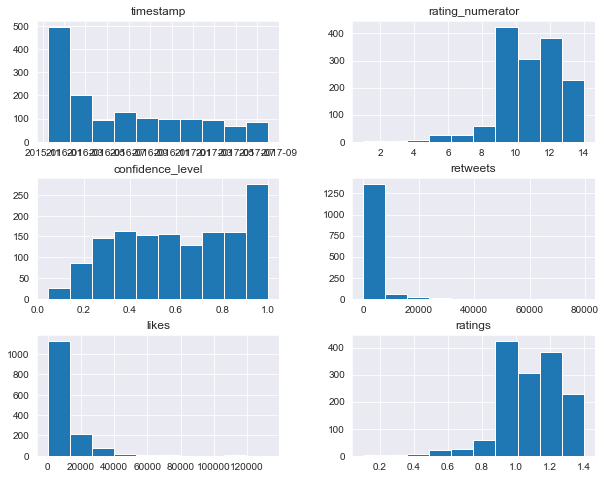

In [99]:
# Plot a histogram to show the distributions of columns in this dataset
master_df.hist(figsize=(10, 8));

### Relationship among variables

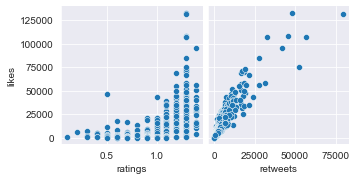

In [100]:
# Plot a scatterplot chart to show relationship between likes & (ratings, retweets)
variables1 = 'likes'
variables2 = ['ratings', 'retweets']
sns.pairplot(data=master_df, x_vars=variables2, y_vars=variables1);

### Top 10 most occuring breeds in our data set

In [101]:
master_df.dog_breed.value_counts()

Golden retriever                  139
Labrador retriever                 91
Pembroke                           88
Chihuahua                          78
Pug                                54
Chow                               41
Samoyed                            40
Pomeranian                         37
Toy poodle                         37
Malamute                           29
Cocker spaniel                     27
French bulldog                     26
Chesapeake bay retriever           23
Miniature pinscher                 21
German shepherd                    20
Staffordshire bullterrier          19
Siberian husky                     19
Maltese dog                        18
Eskimo dog                         18
Shetland sheepdog                  18
Beagle                             17
Cardigan                           17
Shih-tzu                           17
Italian greyhound                  16
Rottweiler                         16
Lakeland terrier                   15
Kuvasz      

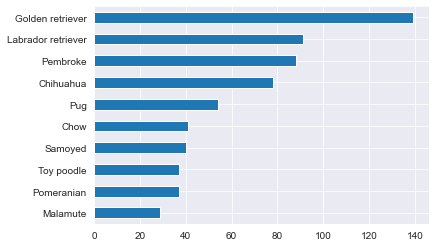

In [102]:
# Plot a chart to show the most occuring dog breeds in this dataset
master_df.dog_breed.value_counts().head(10).sort_values(ascending=True).plot(kind='barh');

### Dog breed counts and Rating averages per Dog Stage

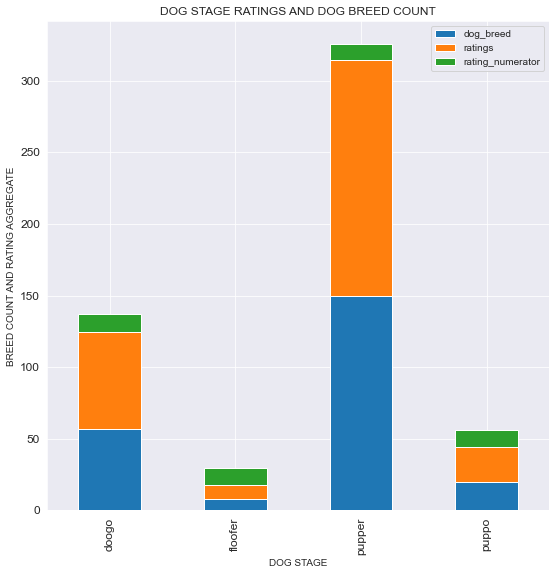

In [103]:
# Plot a stacked bar chart showing the number of dog breeds and Ratings aggregates per Dog stage
master_df.groupby('dog_stage')[['dog_breed', 'ratings', 'rating_numerator']].aggregate({'dog_breed':'count', 'ratings':'sum', 'rating_numerator':'mean'}).plot.bar(stacked=True, figsize=(9, 9), title='DOG STAGE RATINGS AND DOG BREED COUNT', fontsize=12, ylabel='BREED COUNT AND RATING AGGREGATE', xlabel='DOG STAGE');

### OVERALL average ratings of dog breeds in the dataset

In [104]:
breed_avgRate = master_df.groupby('dog_breed')[['ratings', 'rating_numerator', 'likes', 'retweets']].mean().sort_values(by='rating_numerator', ascending=False)
breed_avgRate

ratings  rating_numerator         likes  \
dog_breed                                                                  
Saluki                          1.250000         12.500000  24060.000000   
Briard                          1.233333         12.333333   9511.666667   
Tibetan mastiff                 1.225000         12.250000  12173.500000   
Border terrier                  1.214286         12.142857  13578.000000   
Silky terrier                   1.200000         12.000000   7317.000000   
Standard schnauzer              1.200000         12.000000   2046.000000   
Eskimo dog                      1.177778         11.777778  12001.555556   
Gordon setter                   1.175000         11.750000   5529.250000   
Irish setter                    1.175000         11.750000  10581.750000   
Samoyed                         1.170000         11.700000  13574.775000   
Chow                            1.160976         11.609756   9859.536585   
Golden retriever                1.156115         11.561151  12631.424460   
Cardigan                        1.152941         11.529412  15311.000000   
Wire-haired fox terrier         1.150000         11.500000   8538.500000   
Giant schnauzer                 1.150000         11.500000  17314.500000   
Australian terrier              1.150000         11.500000  11127.500000   
Great pyrenees                  1.146154         11.461538  13680.538462   
Kelpie                          1.145455         11.454545   9984.363636   
Pembroke                        1.144318         11.443182  11304.034091   
Leonberg                        1.133333         11.333333  14934.333333   
Greater swiss mountain dog      1.133333         11.333333  10523.666667   
Norfolk terrier                 1.133333         11.333333   5837.833333   
Irish water spaniel             1.133333         11.333333  16400.000000   
Siberian husky                  1.131579         11.315789   7232.000000   
Cocker spaniel                  1.129630         11.296296  11697.222222   
French bulldog                  1.126923         11.269231  17913.000000   
Doberman                        1.125000         11.250000   8482.750000   
Bernese mountain dog            1.120000         11.200000   6790.700000   
Pomeranian                      1.118919         11.189189   7535.621622   
Rottweiler                      1.118750         11.187500   7982.437500   
Pekinese                        1.115385         11.153846   7166.461538   
Basset                          1.115385         11.153846  13866.000000   
Norwegian elkhound              1.114286         11.142857  12363.571429   
Labrador retriever              1.113187         11.131868  12140.879121   
Flat-coated retriever           1.111111         11.111111  20241.888889   
Blenheim spaniel                1.110000         11.100000   9280.900000   
English springer                1.110000         11.100000  15808.400000   
Collie                          1.110000         11.100000   7336.800000   
Toy poodle                      1.105405         11.054054   6774.270270   
Curly-coated retriever          1.100000         11.000000   6434.250000   
Cairn                           1.100000         11.000000   5443.333333   
Toy terrier                     1.100000         11.000000   4497.000000   
Appenzeller                     1.100000         11.000000   7317.500000   
American staffordshire terrier  1.100000         11.000000   7559.538462   
Komondor                        1.100000         11.000000   9957.666667   
German shepherd                 1.100000         11.000000  10154.650000   
Weimaraner                      1.100000         11.000000  11982.750000   
Kuvasz                          1.100000         11.000000   5883.071429   
Entlebucher                     1.100000         11.000000   2678.000000   
Sussex spaniel                  1.100000         11.000000   4061.500000   
Old english sheepdog            1.090909         10.909091   8276.454545   
Malam

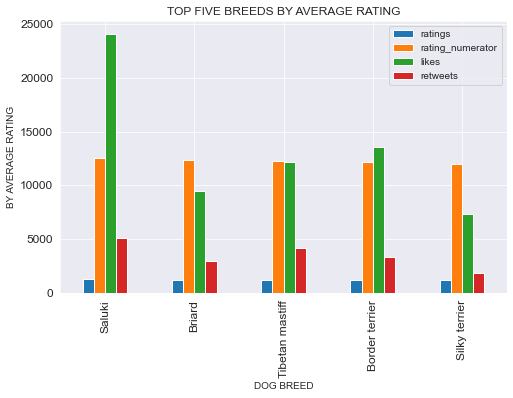

In [105]:
# Plot a chart to show the average rating of dog breeds, include the retweets and likes associated with that breed
breed_avgRate = master_df.groupby('dog_breed')[['ratings', 'rating_numerator', 'likes', 'retweets']].mean().sort_values(by='rating_numerator', ascending=False)
breed_avgRate[['ratings', 'rating_numerator']] = breed_avgRate[['ratings', 'rating_numerator']]*1000
breed_avgRate.head(5).plot(kind='bar', xlabel='DOG BREED', ylabel='BY AVERAGE RATING', title='TOP FIVE BREEDS BY AVERAGE RATING', fontsize=12, figsize=(8,5));

### Top 3 Rated dog breeds in each dog stage

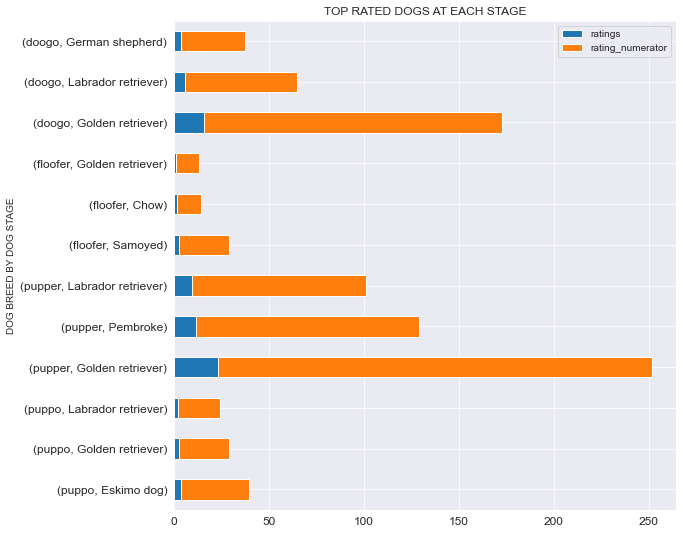

In [106]:
# Plot a stacked bar chart showing the top 3 rated dog breeds at all dog stages
breed_rating = master_df.groupby(['dog_stage', 'dog_breed'])[['ratings', 'rating_numerator']].agg({'ratings':'sum', 'rating_numerator':'sum'}).sort_values(by=['dog_stage', 'ratings'], ascending=False)
breed_rating.groupby('dog_stage').head(3).plot.barh(stacked=True, xlabel='DOG BREED BY DOG STAGE', title='TOP RATED DOGS AT EACH STAGE', figsize=(9,9), fontsize=12);

### Top 5 Most Liked dog breeds on Average

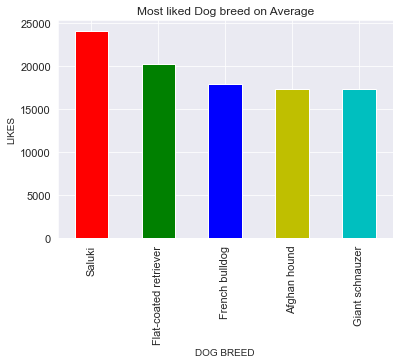

In [107]:
# Plot the top 5 most liked dog breeds
master_df.groupby('dog_breed')['likes'].mean().sort_values(ascending=False).head(5).plot(kind='bar', color=['r','g','b','y','c'], title='Most liked Dog breed on Average', xlabel='DOG BREED', ylabel='LIKES', fontsize=11);

### Top 5 most retweeted dog breeds on Average

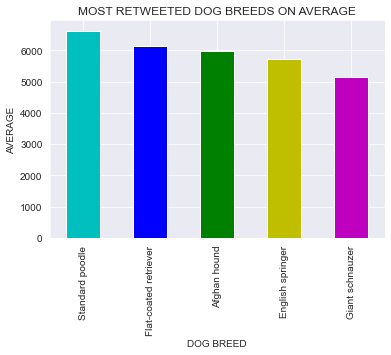

In [108]:
# Plot the 5 most retweeted dog breeds in the dataset
master_df.groupby('dog_breed')['retweets'].mean().sort_values(ascending=False).head(5).plot(kind='bar', color=['c','b','g','y','m'], ylabel='AVERAGE', xlabel='DOG BREED', title='MOST RETWEETED DOG BREEDS ON AVERAGE');

### Highest Sources of Tweet

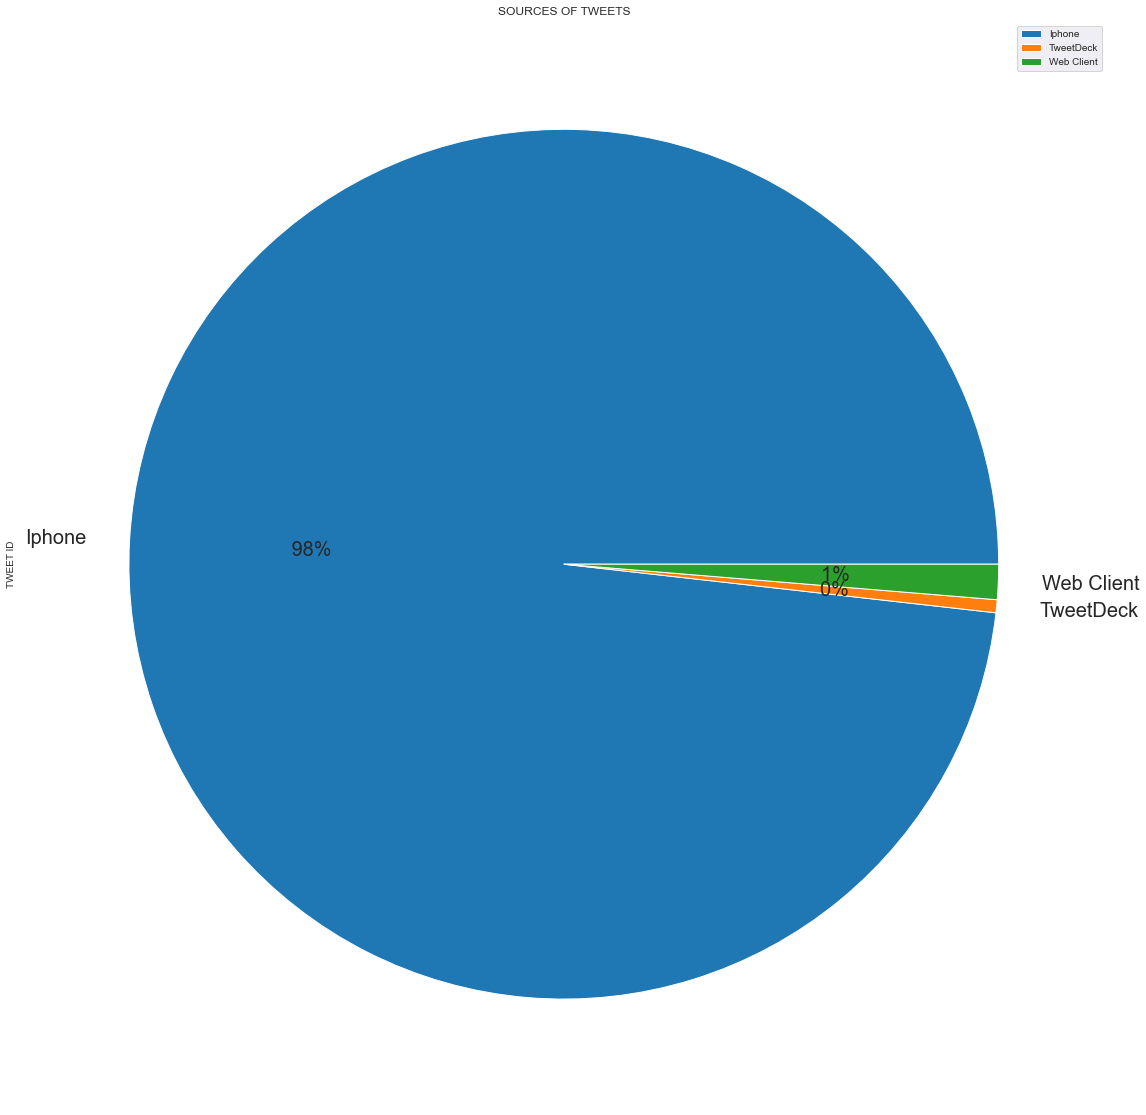

In [109]:
# Plot a chart to see which medium was used more often to tweet
master_df.groupby('source')['tweet_id'].count().plot(kind='pie', autopct='%5.0f%%', figsize=(20, 20), title='SOURCES OF TWEETS', legend='sources', fontsize=20, ylabel='TWEET ID');

### Most rated dog stage on average

In [110]:
sn = master_df.groupby('dog_stage')[['dog_breed', 'rating_numerator']].mean().sort_values(by='rating_numerator', ascending=False)
sn

rating_numerator
dog_stage                  
puppo             12.050000
doogo             11.912281
floofer           11.875000
pupper            10.960000

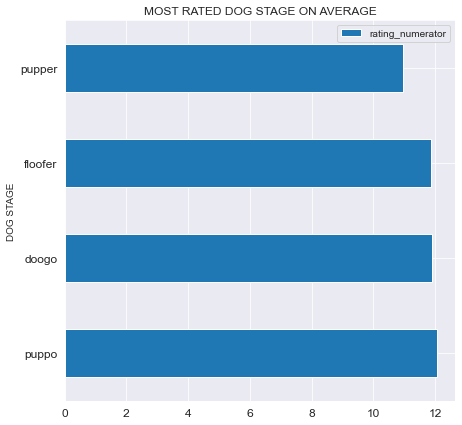

In [111]:
sn = master_df.groupby('dog_stage')[['dog_breed', 'rating_numerator']].mean().sort_values(by='rating_numerator', ascending=False)
sn.plot(kind='barh', xlabel='DOG STAGE', ylabel='RATING', title='MOST RATED DOG STAGE ON AVERAGE', fontsize=12, figsize=(7,7));



### Top 2 most occuring dog breeds at each dogstage

In [112]:
snc = master_df.groupby('dog_stage', as_index=False)['dog_breed'].value_counts()
snc.groupby('dog_stage').head(2).set_index(['dog_stage', 'dog_breed'])

count
dog_stage dog_breed                
doogo     Golden retriever       13
          Labrador retriever      5
floofer   Samoyed                 2
          Chow                    1
pupper    Golden retriever       20
          Pembroke               10
puppo     Eskimo dog              3
          Golden retriever        2

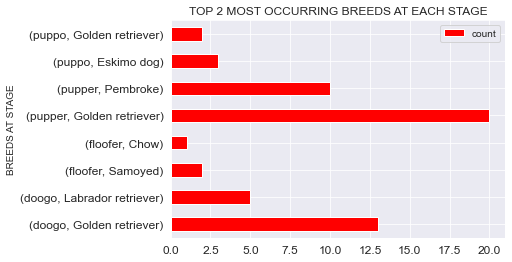

In [113]:
# Plot a chart showing the top 2 most occuring dog breeds at each dog stage
snc = master_df.groupby('dog_stage', as_index=False)['dog_breed'].value_counts()
snc.groupby('dog_stage').head(2).set_index(['dog_stage', 'dog_breed']).plot(kind='barh', xlabel='BREEDS AT STAGE', ylabel='OCCURRENCE', title='TOP 2 MOST OCCURRING BREEDS AT EACH STAGE', fontsize=12, color='r');

### Most adored dog stages on Average

In [114]:
master_df.groupby('dog_stage')[['retweets', 'likes']].mean()

retweets         likes
dog_stage                           
doogo      7364.894737  20153.368421
floofer    4776.750000  13701.375000
pupper     2659.626667   8324.520000
puppo      7183.700000  23585.000000

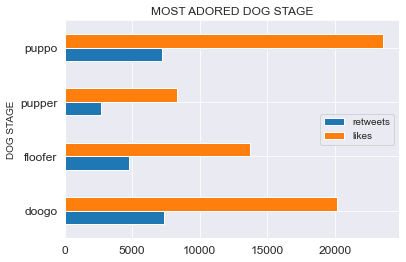

In [115]:
# Plot a chart showing the most adored dog stages using likes and retweets
master_df.groupby('dog_stage')[['retweets', 'likes']].mean().plot(kind='barh', fontsize=12, xlabel='DOG STAGE', ylabel='ADORABLE', title='MOST ADORED DOG STAGE');

### Categorise rating levels

In [116]:
# Create bin edges to group ratings into intervals
bin_edges = [0, 4, 7, 10, 15]
bin_edges

[0, 4, 7, 10, 15]

In [117]:
# Label ratings:
# low represents 0 to 4
# good represents 5 to 7
# High represents 8 to 10, with 10 being the denominator
# extraordinary represents ridiculous ratings above the denominaotor

bin_names = ['low', 'good', 'High', 'extraodinary']
bin_names

['low', 'good', 'High', 'extraodinary']

In [118]:
master_df['rating_levels'] = pd.cut(master_df['rating_numerator'], bin_edges, labels=bin_names)

### Aggregation of Popularity metrics by rating levels

In [119]:
# Plot a chart to show the aggregate values of retweets, like and rating numerator by rating levels
master_df['rating_levels'] = master_df.rating_levels.astype('category')

In [120]:
master_df.rating_levels.value_counts()

extraodinary    918
High            483
good             47
low              10
Name: rating_levels, dtype: int64

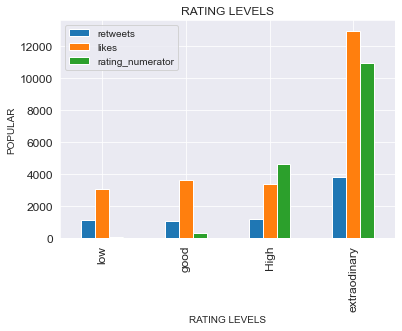

In [121]:
master_df.groupby('rating_levels').aggregate({'retweets':'mean', 'likes':'mean', 'rating_numerator':'sum'}).plot(kind='bar', figsize=(6,4), xlabel='RATING LEVELS', ylabel='POPULAR', title='RATING LEVELS', fontsize=12);

### Top 2 of the most adorable breeds at each stage of a dog's life by aggregate

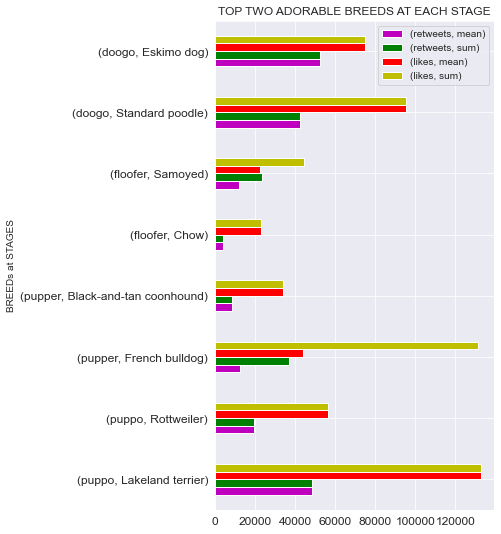

In [122]:
# Plot a chart showing the top two dog breeds with the most avegae likes and retweets  at each dog stage
adorables = master_df.groupby(['dog_stage', 'dog_breed'])[['retweets', 'likes']].agg(['mean', 'sum']).sort_values(by=['dog_stage', ('likes', 'mean'), ('retweets', 'mean')], ascending=False)
adorables.groupby('dog_stage').head(2).plot(kind='barh', xlabel='BREEDs at STAGES', ylabel='LIKES AND RETWEETS', title='TOP TWO ADORABLE BREEDS AT EACH STAGE', fontsize=12, figsize=(5, 9), color=['m','g','r','y']);
plt.legend();

### Let's look at the most liked dogs in our data set and hopefully get to learn their names

In [123]:
from io import BytesIO
import PIL.Image
from PIL import Image
import glob

mostlikes = master_df[['likes', 'jpg_url', 'dog_breed', 'dog_stage', 'name']].sort_values(by='likes', ascending=False).head(5)
mostlikes

likes  \
249  132810   
616  131075   
51   107956   
326  107015   
95   106827   

                                                                                     jpg_url  \
249                                          https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg   
616  https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg   
51   https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg   
326  https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg   
95                                           https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg   

              dog_breed dog_stage     name  
249    Lakeland terrier     puppo      NaN  
616  Labrador retriever     doogo      NaN  
51     English springer       NaN  Duddles  
326           Chihuahua       NaN  Stephan  
95       French bulldog    pupper   Jamesy

#### Number 1 most liked dog in our dataset, sadly it hasn't got a name ☹, but it's a Lakeland terrier!

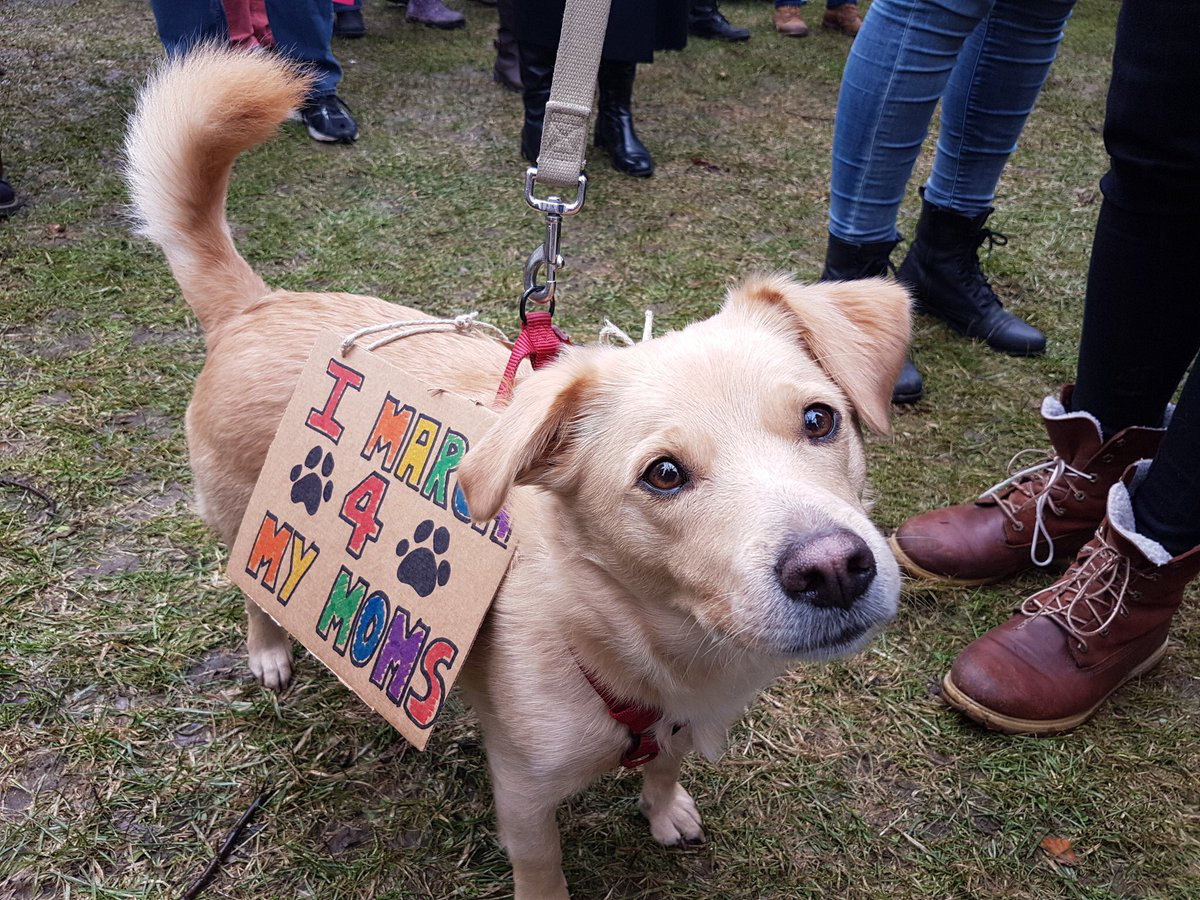

In [124]:
url = mostlikes.jpg_url[249]
r = requests.get(url)
Image.open(BytesIO(r.content))

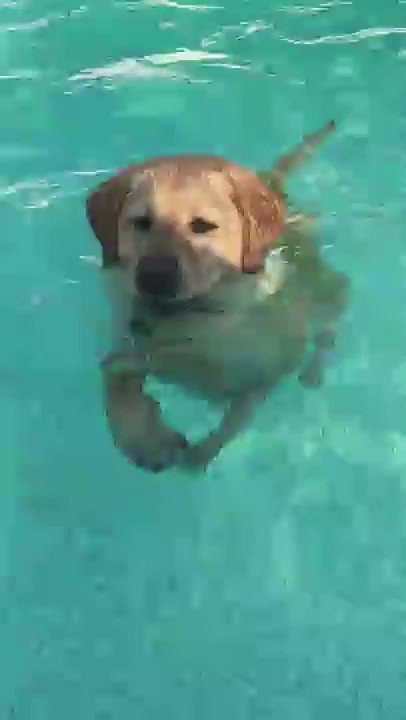

In [125]:
# Number 2 most liked dog in our dataset, it hasn't got a name too 😞, but it's a labrador retriever

url = mostlikes.jpg_url[616]
r = requests.get(url)
Image.open(BytesIO(r.content))

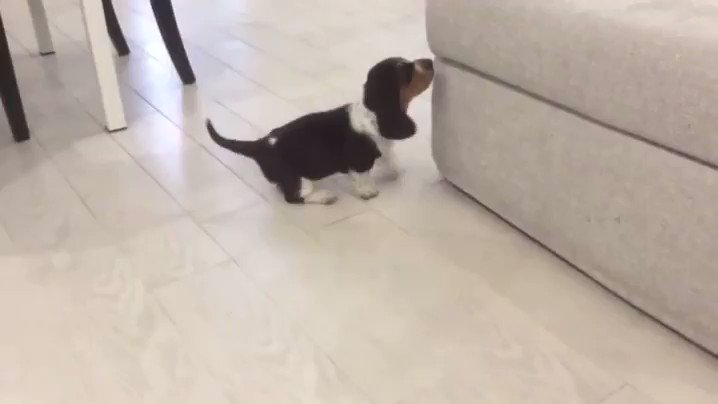

In [126]:
# Number 3 most liked dog, this one has a name, it's duddles and it's an English springer 

url = mostlikes.jpg_url[51]
r = requests.get(url)
Image.open(BytesIO(r.content))

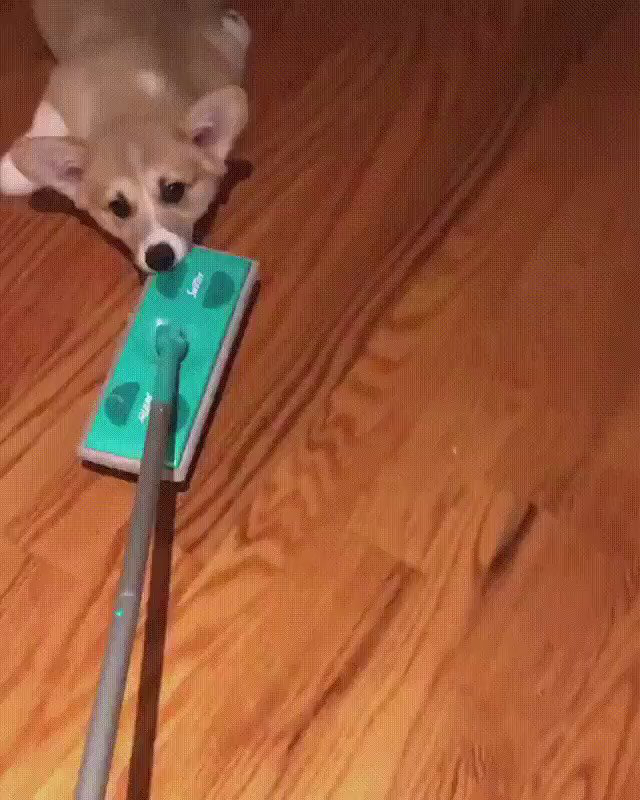

In [127]:
# Number 4 most liked dog, the name is stefan and it's a Chihuahua

url = mostlikes.jpg_url[326]
r = requests.get(url)
Image.open(BytesIO(r.content))

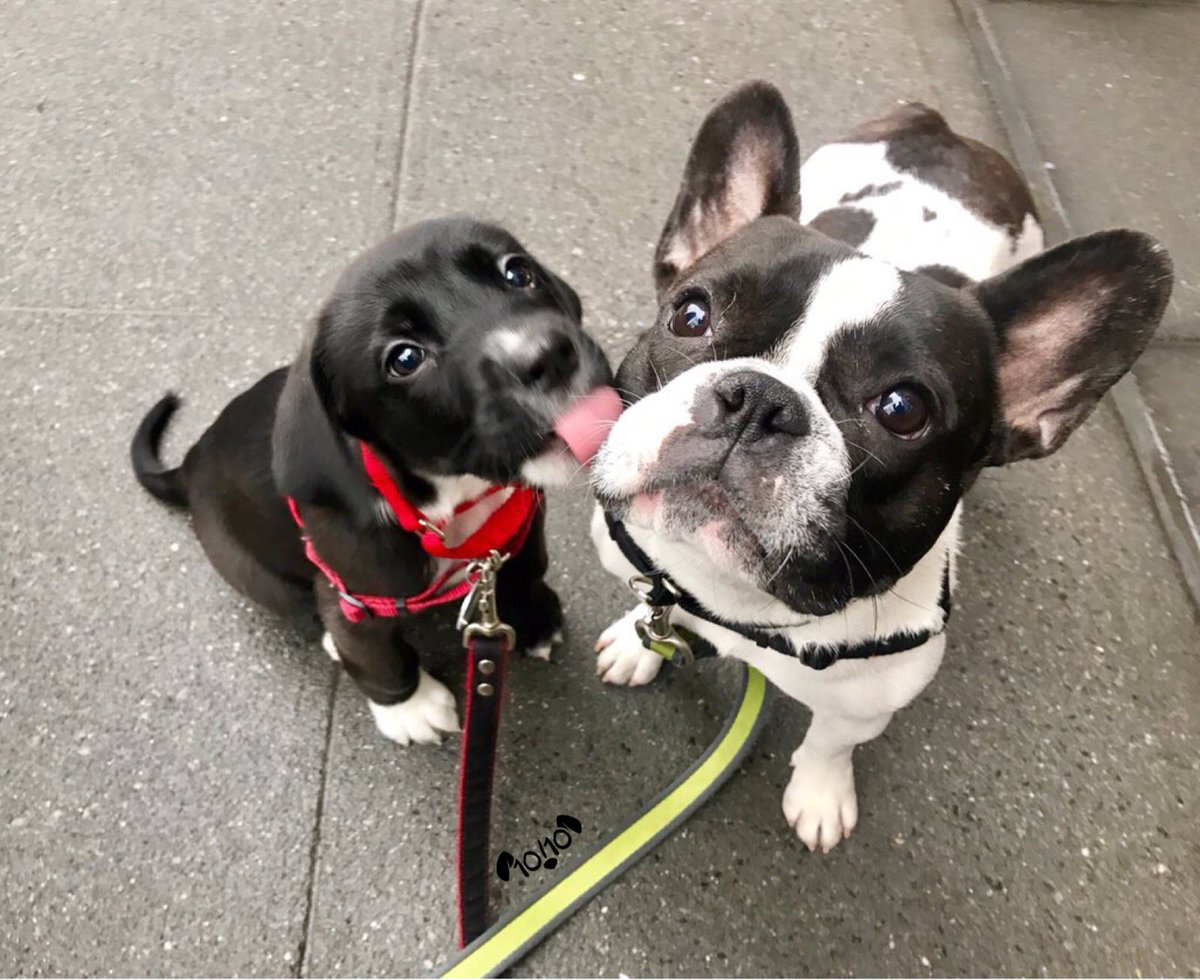

In [128]:
# Number 5 most liked dog, it's name is Jamesy and it's a french bulldog

url = mostlikes.jpg_url[95]
r = requests.get(url)
Image.open(BytesIO(r.content))

### Let's take a look at the volume of Interactions over time

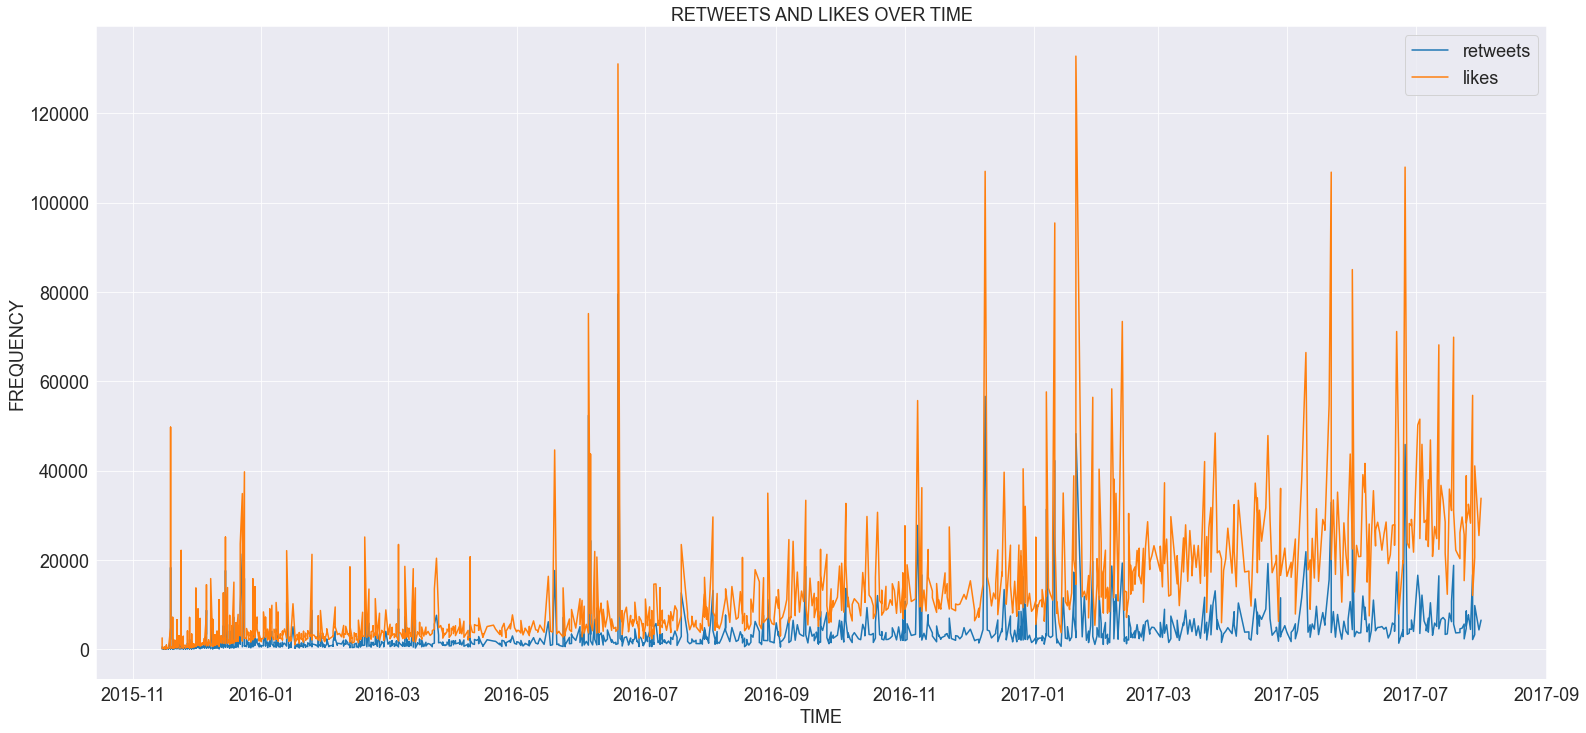

In [129]:
# Plot a chart to show the levels of interactions over time in our dataset

plt.figure(figsize=(26,12))
plt.plot(master_df.timestamp, master_df.retweets)
plt.plot(master_df.timestamp, master_df.likes)
plt.xlabel('TIME', fontsize=18)
plt.ylabel('FREQUENCY', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('RETWEETS AND LIKES OVER TIME', fontsize=18)
plt.legend(['retweets', 'likes'], fontsize=18)
plt.show();

From the chart above, we can see that the most interactions occured within the period from 2016-06 to 2017-01

### Total rating of dog breeds in the dataset

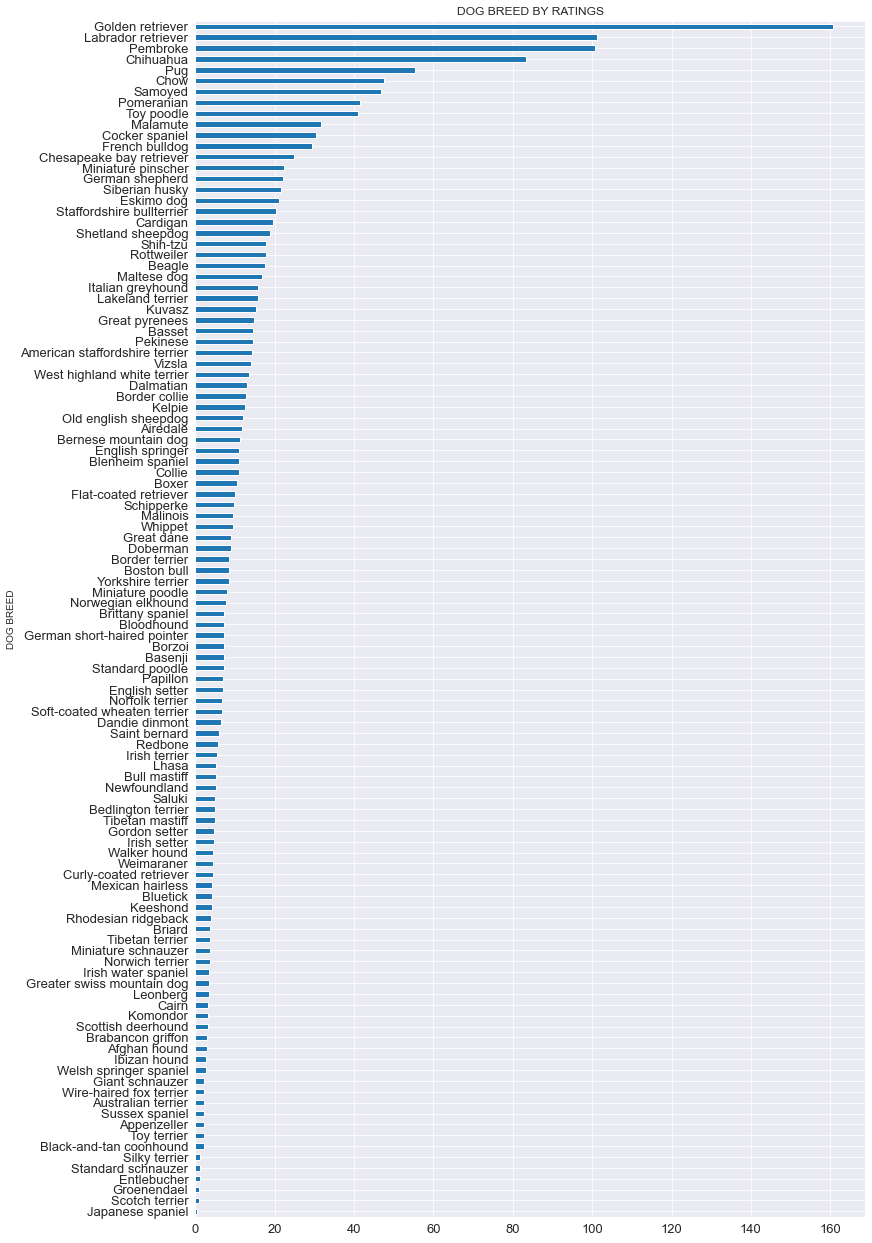

In [130]:
master_df.groupby('dog_breed')['ratings'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(12,22), title='DOG BREED BY RATINGS', xlabel='DOG BREED', ylabel='RATINGS', fontsize=13);

### Total likes and retweets per dog stage

In [131]:
master_df.groupby('dog_stage')[['likes', 'retweets']].sum()

likes  retweets
dog_stage                   
doogo      1148742    419799
floofer     109611     38214
pupper     1248678    398944
puppo       471700    143674

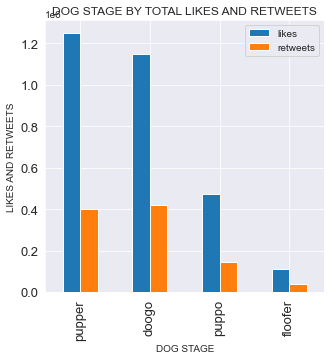

In [132]:
# Plot a chart showing which dog stages has the highest totals of likes and retweets
master_df.groupby('dog_stage')[['likes', 'retweets']].sum().sort_values(by=['likes', 'retweets'], ascending=False).plot(kind='bar', figsize=(5,5), title='DOG STAGE BY TOTAL LIKES AND RETWEETS', xlabel='DOG STAGE', ylabel='LIKES AND RETWEETS', fontsize=13);

### Total rating per dog stage

In [133]:
master_df.groupby('dog_stage')['rating_numerator'].sum()

dog_stage
doogo       679
floofer      95
pupper     1644
puppo       241
Name: rating_numerator, dtype: int64

### Counts of Dog stage

In [134]:
master_df.dog_stage.value_counts()

pupper     150
doogo       57
puppo       20
floofer      8
Name: dog_stage, dtype: int64

### Conclusion:

In Conclusion, to draw meaningful insights the data set has to be analysed critically and by doing so you end up with varying results. the results differ according to the method of aggregation which is to be expected. 

### Insights:
1.Firstly, there exist a positive correlation between likes and retweets, as retweets increase so does likes. this makes sense since more retweets mean increased visibility, audience approval and higher ratings.

2.Much of the total number of likes were shared among dogs breeds at the pupper stage but on avergae more likes, retweets and adoration went to dog breeds at the puppo stage.

3.From the time series chart, we can see that the most interactions occured within the period from 2016-06 to 2017-01, giving us an insight into whih period recorded the most ativity.

### Reference:
https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/, https://kanoki.org/2022/06/28/pandas-create-new-column-based-on-value-in-other-columns-with-multiple-conditions/,  https://www.kaggle.com/code/msytnadeem/weratedogs-tweet-data-wrangling,   https://pandas.pydata.org/docs/user_guide/style.html, https://realpython.com/pandas-groupby/, https://datascientyst.com/sort-multiindex-pandas/,  https://stackoverflow.com/questions/53393597/changing-4-columns-in-only-1,  https://www.anycodings.com/questions/resize-the-image-in-jupyter-notebook-using-markdown,  www.geeksforgeeks.org
www.codegrepper.com,  www.jamesrledoux.com

